In [6]:
from sys import path
path.append("..")
import math
import networkx as nx
from rdd import RDD
from rdd import measures
from rdd import visualize


g1 = nx.Graph()
g2 = nx.Graph()


real_network2 = nx.read_adjlist("../data/facebook_combined.txt", nodetype=int)
real_paths1 = nx.single_source_shortest_path(real_network2, 1, 4)
node_list1 = RDD.populate_node_list(real_paths1)
list_of_nodes = []
for node in node_list1:
    list_of_nodes.append(node.name)
subgraph = RDD.nodes_to_graph(real_network2, list_of_nodes)


real_paths2 = nx.single_source_shortest_path(real_network2, 1, 4)
node_list2 = RDD.populate_node_list(real_paths2)
list_of_nodes2 = []
for node in node_list2:
    list_of_nodes2.append(node.name)
subgraph2 = RDD.nodes_to_graph(real_network2, list_of_nodes2)




g1.add_edges_from([
    (1, 2),
    (1, 7),
    (1, 8),
    (2, 3),
    (2, 4),
    (3, 4),
    (3, 6),
    (4, 5),
])


g2.add_edges_from([
    (1,2),
    (2,4),
    (2,3),
    (3,5),
    (4,5),
    (5,6),    
])

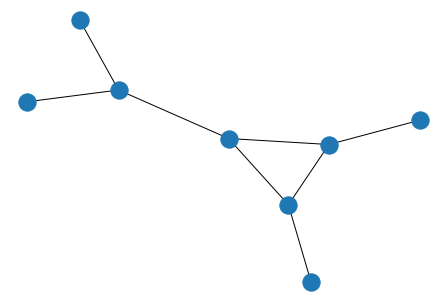

In [7]:
nx.draw(g1)

# Shortest Paths

To compute the radial distribution distance (RDD), the first thing we have to do is get the shortest path for each node up to the specified radius for the given graph. In this case, we use radius $r = 4\$

In [8]:
real_paths1 = nx.single_source_shortest_path(g1, 1, 5)
real_paths2 = nx.single_source_shortest_path(g1, 1, 5)
real_paths1, '', real_paths2

({1: [1],
  2: [1, 2],
  7: [1, 7],
  8: [1, 8],
  3: [1, 2, 3],
  4: [1, 2, 4],
  6: [1, 2, 3, 6],
  5: [1, 2, 4, 5]},
 '',
 {1: [1],
  2: [1, 2],
  7: [1, 7],
  8: [1, 8],
  3: [1, 2, 3],
  4: [1, 2, 4],
  6: [1, 2, 3, 6],
  5: [1, 2, 4, 5]})

# List of Node Objects

Now we create a list of Node objects based upon those shortest path lists:


In [9]:
node_list1 = RDD.populate_node_list(real_paths1)
node_list2 = RDD.populate_node_list(real_paths2)
node_list1, "    ", node_list2

([node 1, radius 0, measure 0,
  node 2, radius 1, measure 0,
  node 7, radius 1, measure 0,
  node 8, radius 1, measure 0,
  node 3, radius 2, measure 0,
  node 4, radius 2, measure 0,
  node 6, radius 3, measure 0,
  node 5, radius 3, measure 0],
 '    ',
 [node 1, radius 0, measure 0,
  node 2, radius 1, measure 0,
  node 7, radius 1, measure 0,
  node 8, radius 1, measure 0,
  node 3, radius 2, measure 0,
  node 4, radius 2, measure 0,
  node 6, radius 3, measure 0,
  node 5, radius 3, measure 0])

# Measures

Now we have to get our $\mu$ or measures. Normally, we would call one of the measure functions that returns a list of measures, but for the purposes of following the paper we will use the arbitrary given measures in the paper.

In [14]:
measures_u = measures.triangles(g1, node_list1)
measures_v = measures.triangles(g1, node_list2)

measures_u, measures_v
# measures_u = [1, 1, 2, 2, 1, 1]
# measures_v = [1, 1, 2, 2, 1, 1]

([0, 1, 0, 0, 1, 1, 0, 0], [0, 1, 0, 0, 1, 1, 0, 0])

## Add measures to Nodes

Now we update the Node objects' measure values with what we just retrieved:

In [15]:
measures.add_measures_to_node(node_list1, measures_u)
measures.add_measures_to_node(node_list2, measures_v)
node_list1, '', node_list2

([node 1, radius 0, measure 0,
  node 2, radius 1, measure 1,
  node 7, radius 1, measure 0,
  node 8, radius 1, measure 0,
  node 3, radius 2, measure 1,
  node 4, radius 2, measure 1,
  node 6, radius 3, measure 0,
  node 5, radius 3, measure 0],
 '',
 [node 1, radius 0, measure 0,
  node 2, radius 1, measure 1,
  node 7, radius 1, measure 0,
  node 8, radius 1, measure 0,
  node 3, radius 2, measure 1,
  node 4, radius 2, measure 1,
  node 6, radius 3, measure 0,
  node 5, radius 3, measure 0])

# CRD

Now we get the cumulative radial distributions (CRD) for for both nodes:

In [16]:
crd1 = measures.get_crd(node_list1)
crd2 = measures.get_crd(node_list2)
crd1, crd2

(defaultdict(int, {0: 0, 1: 1, 2: 3, 3: 3}),
 defaultdict(int, {0: 0, 1: 1, 2: 3, 3: 3}))

# Union

We take the union of the radiuses


In [17]:
measures.ensure_radial_parity(crd1, crd2)
crd1, crd2

(defaultdict(int, {0: 0, 1: 1, 2: 3, 3: 3}),
 defaultdict(int, {0: 0, 1: 1, 2: 3, 3: 3}))

# RDD

Now we compute the Radial Distribution Distance

In [18]:
rdd = RDD.get_rdd(crd1, crd2)
rdd

0.0

So we can say that node 1 in graph u has a radial distribution distance of $\approx$ 0.05 with respect to node 1 in graph v.

## How do we get the RDD?

First, we get the union of our radiuses:

In [12]:
crd = RDD.get_crd_union(crd1, crd2)
crd

[0, 1, 2, 3, 4]

Now we do $\sum_{r=0}^{max radius}e^{-r}|m_1(r) - m_2(r)|$

In [13]:
rdd = 0
for r in crd:
    rdd += math.exp(-r)*abs(crd1[r] - crd2[r])
rdd

0.049787068367863944